## Manahil Fatima Anwar
## 20K-0134
## BAI-7A
## CV Lab 04 - Class Tasks

### Task 01

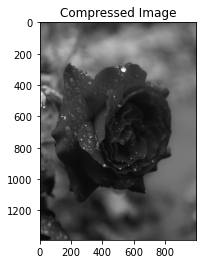

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('flower.jpg', cv2.IMREAD_GRAYSCALE)

# Perform the 2D Fourier Transform
filtered_fourier_transform = np.fft.fft2(image)

# Set a threshold to retain only significant frequency components
threshold = 1000 # Adjust as needed
filtered_fourier_transform[abs(filtered_fourier_transform) < threshold] = 0

# Perform the inverse Fourier Transform to obtain the compressed image
compressed_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fourier_transform)))

# Display the compressed image
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')
plt.show()

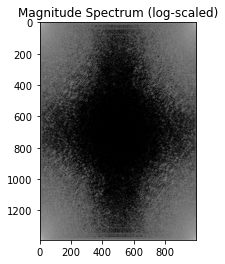

In [2]:
# Calculate the magnitude spectrum
magnitude_spectrum = np.log(np.abs(filtered_fourier_transform) + 1)

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (log-scaled)')
plt.show()

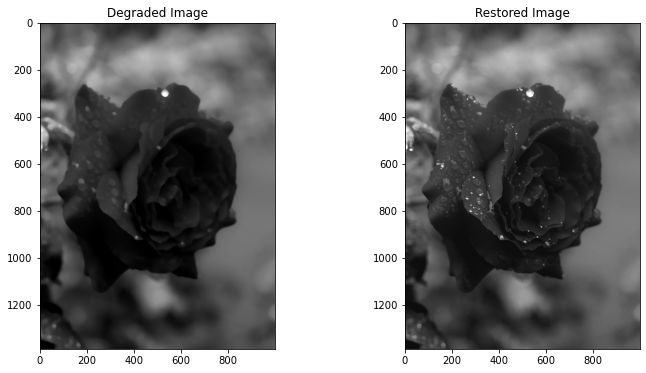

In [18]:
# Perform the 2D Fourier Transform for both the original and degraded images
degraded_image = cv2.medianBlur(image, 15)
fourier_transform_original = np.fft.fft2(image)
fourier_transform_degraded = np.fft.fft2(degraded_image)
# Compute the inverse filter in the frequency domain
epsilon = 1e-6
inverse_filter = np.divide(fourier_transform_original, fourier_transform_degraded + epsilon)
# Apply the inverse filter to the degraded image in the frequency domain
restored_image_frequency_domain = fourier_transform_degraded * inverse_filter
# Perform the inverse Fourier Transform to obtain the restored image
restored_image = np.abs(np.fft.ifft2(restored_image_frequency_domain))
# Display the degraded and restored images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')
plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image')
plt.show()

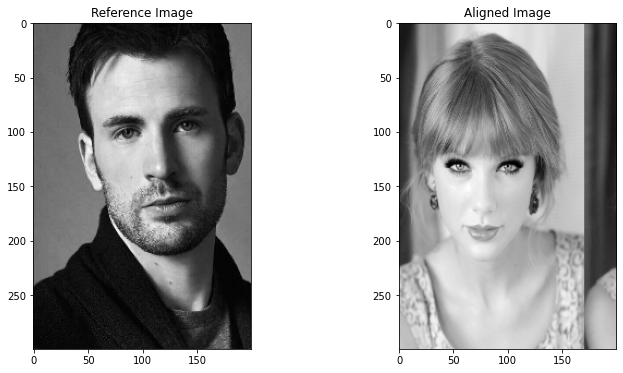

In [29]:
# Load the reference and target images (grayscale)
reference_image = cv2.imread('ref.jpg', cv2.IMREAD_GRAYSCALE)
reference_image = cv2.resize(reference_image, (200, 300))
target_image = cv2.imread('target.jpg', cv2.IMREAD_GRAYSCALE)
target_image = cv2.resize(target_image, (200, 300))

# Perform the 2D Fourier Transform for both images

fourier_transform_reference = np.fft.fft2(reference_image)
fourier_transform_target = np.fft.fft2(target_image)

# Calculate the cross-power spectrum
cross_power_spectrum = fourier_transform_reference * np.conj(fourier_transform_target)
# Calculate phase correlation
phase_correlation = np.fft.ifft2(cross_power_spectrum / (np.abs(cross_power_spectrum) + 1e-6))
# Find the peak in the phase correlation to estimate translation
shifted_peak = np.unravel_index(np.argmax(np.abs(phase_correlation)), phase_correlation.shape)
x_shift, y_shift = shifted_peak[1], shifted_peak[0]
# Apply translation to align the images
aligned_image = np.roll(target_image, (y_shift, x_shift), axis=(0, 1))
# Display the reference and aligned images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(reference_image, cmap='gray')
plt.title('Reference Image')
plt.subplot(1, 2, 2)
plt.imshow(aligned_image, cmap='gray')
plt.title('Aligned Image')
plt.show()

### Task 03

<ipython-input-32-a4a5a2f706ce>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 3, 4)


(-0.5, 280.5, 179.5, -0.5)

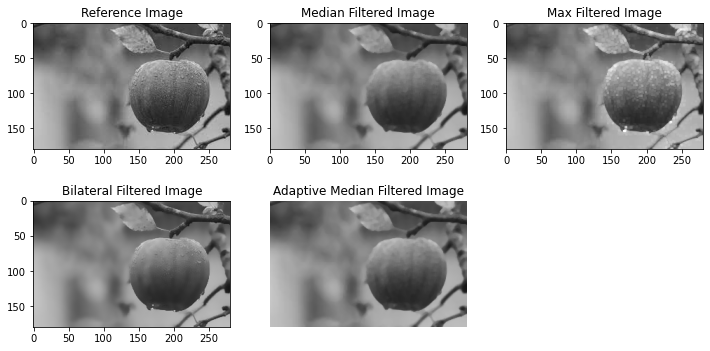

In [32]:
image = cv2.imread('task 03.jpg', cv2.COLOR_BGR2GRAY)
median_filtered_image = cv2.medianBlur(image, 5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
max_filtered_image = cv2.dilate(image, kernel)
min_filtered_image = cv2.erode(image, kernel)
bilateral_filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
kernel = np.array([[0, 1, 0],
[1, 5, 1],
[0, 1, 0]], dtype=np.float32)
kernel /= kernel.sum()
filtered_image_replicate = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REPLICATE)
adaptive_median_filtered_image = cv2.medianBlur(filtered_image_replicate, 5)
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Reference Image')
plt.subplot(2, 3, 2)
plt.imshow(median_filtered_image)
plt.title('Median Filtered Image')
plt.subplot(2, 3, 3)
plt.imshow(max_filtered_image)
plt.title('Max Filtered Image')
plt.subplot(2, 3, 4)
plt.imshow(min_filtered_image)
plt.title('Min Filtered Image')
plt.subplot(2, 3, 4)
plt.imshow(bilateral_filtered_image)
plt.title('Bilateral Filtered Image')
plt.subplot(2, 3, 5)
plt.imshow(adaptive_median_filtered_image)
plt.title('Adaptive Median Filtered Image')
plt.axis('off')

### task 05

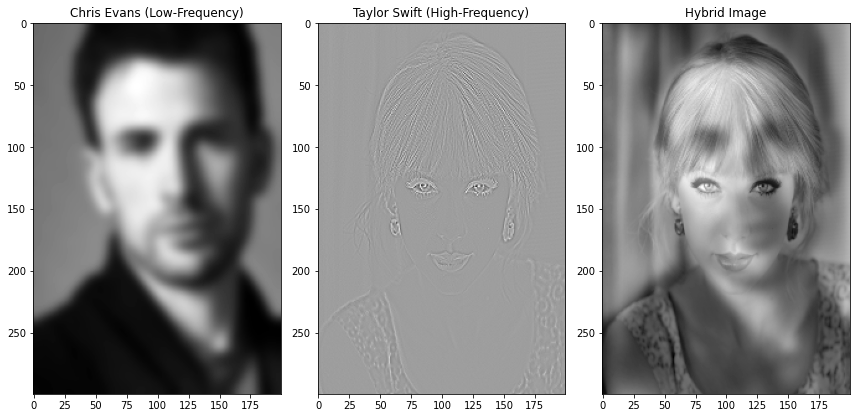

In [39]:
ce_image = cv2.imread('ref.jpg')
ce_image = cv2.resize(ce_image, (200,300))
ts_image = cv2.imread('target.jpg')
ts_image = cv2.resize(ts_image,(200,300))
# Convert the images to grayscale
ce_gray = cv2.cvtColor(ce_image, cv2.COLOR_BGR2GRAY)
ts_gray = cv2.cvtColor(ts_image, cv2.COLOR_BGR2GRAY)
# Apply Gaussian blur to Einstein (low-pass filter)
ce_low_pass = cv2.GaussianBlur(ce_gray, (25, 25), 0)
# Subtract the low-pass image from Newton (high-pass filter)
ts_high_pass = ts_gray - ce_low_pass
ts_high_pass = cv2.Laplacian(ts_gray, cv2.CV_64F, (3,3))
# Add the low-pass Einstein and high-pass Newton to create the hybrid image
# Perform 2D Fourier Transform
fourier_transform = np.fft.fft2(ts_gray)
# Shift zero frequency components to the center
fourier_transform_shifted = np.fft.fftshift(fourier_transform)
# Define the size of the high-pass filter kernel (e.g., a Laplacian kernel)
kernel_size = 5
# Create a high-pass filter mask
rows, cols = ts_gray.shape
center_row, center_col = rows // 2, cols // 2
mask = np.ones((rows, cols), dtype=np.uint8)
mask[center_row - kernel_size:center_row + kernel_size + 1,
center_col - kernel_size:center_col + kernel_size + 1] = 0
# Apply the mask to the Fourier Transform
filtered_fourier_transform = fourier_transform_shifted * mask
# Perform the inverse Fourier Transform to obtain the high-pass image
high_pass_image = np.fft.ifft2(np.fft.ifftshift(filtered_fourier_transform)).real
hybrid_image = ce_low_pass + high_pass_image
# Display the original images and the hybrid image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ce_low_pass, cmap='gray')
plt.title('Chris Evans (Low-Frequency)')
plt.subplot(1, 3, 2)
plt.imshow(ts_high_pass, cmap='gray')
plt.title('Taylor Swift (High-Frequency)')
plt.subplot(1, 3, 3)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image')
plt.tight_layout()
plt.show()